# Altın Fiyatları ve İşlem Verileri Analizi

Bu notebook, `goldstock.csv` veri setini kullanarak altın fiyatları ve işlem verileri arasındaki ilişkileri inceler.

## Veri Seti Hakkında
- **Kaynak**: Altın fiyatları ve işlem verileri
- **Değişkenler**:
  - `Date`: Tarih bilgisi
  - `Close`: Gün sonu altın fiyatı
  - `Volume`: İşlem hacmi
  - `Open`: Gün başlangıcı altın fiyatı
  - `High`: Gün içindeki en yüksek fiyat
  - `Low`: Gün içindeki en düşük fiyat

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Görselleştirme ayarları
sns.set_palette('husl')
# Veri setini yükleyelim
file_path = 'c:/Users/emreq/Desktop/Code - Lib - Denemeler/goldstock.csv'
data = pd.read_csv(file_path)

# Tarih sütununu datetime formatına çevirelim
data['Date'] = pd.to_datetime(data['Date'])

# Veri seti özeti
print("Veri seti başlıkları:")
print(data.head())
print("\nVeri seti bilgisi:")
print(data.info())
print("\nEksik değer kontrolü:")
print(data.isnull().sum())

Veri seti başlıkları:
   Unnamed: 0       Date   Close    Volume    Open    High     Low
0           0 2024-01-19  2029.3  166078.0  2027.4  2041.9  2022.2
1           1 2024-01-18  2021.6  167013.0  2009.1  2025.6  2007.7
2           2 2024-01-17  2006.5  245194.0  2031.7  2036.1  2004.6
3           3 2024-01-16  2030.2  277995.0  2053.4  2062.8  2027.6
4           4 2024-01-12  2051.6  250946.0  2033.2  2067.3  2033.1

Veri seti bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  2511 non-null   int64         
 1   Date        2511 non-null   datetime64[ns]
 2   Close       2511 non-null   float64       
 3   Volume      2511 non-null   float64       
 4   Open        2511 non-null   float64       
 5   High        2511 non-null   float64       
 6   Low         2511 non-null   float64       
dtypes: datetime64

In [6]:
# #1-2) Bağımsız ve Bağımlı Değişkenler
print("#1-2) Bağımsız ve Bağımlı Değişkenler Simülasyonu")
# Amaç: Gün sonu altın fiyatını tahmin etmek
# Bağımlı Değişken (Hedef): Close
y = data['Close']
# Bağımsız Değişkenler (Özellikler): Volume, Open, High, Low
X = data[['Volume', 'Open', 'High', 'Low']]
print("Bağımlı Değişken (y) Örneği:\n", y.head())
print("\nBağımsız Değişkenler (X) Örneği:\n", X.head())
print("\n" + "="*30 + "\n")

#1-2) Bağımsız ve Bağımlı Değişkenler Simülasyonu
Bağımlı Değişken (y) Örneği:
 0    2029.3
1    2021.6
2    2006.5
3    2030.2
4    2051.6
Name: Close, dtype: float64

Bağımsız Değişkenler (X) Örneği:
      Volume    Open    High     Low
0  166078.0  2027.4  2041.9  2022.2
1  167013.0  2009.1  2025.6  2007.7
2  245194.0  2031.7  2036.1  2004.6
3  277995.0  2053.4  2062.8  2027.6
4  250946.0  2033.2  2067.3  2033.1




In [7]:
# #3-4) Karıştırıcı ve İlişkili Değişkenler
print("#3-4) Karıştırıcı ve İlişkili Değişkenler Simülasyonu")
# Open ve High birbiriyle ilişkili görünebilir.
correlation = data['Open'].corr(data['High'])
print(f"Open ile High Arasındaki Korelasyon: {correlation:.2f}")

# Ancak bu ilişkinin arkasındaki asıl neden 'Volume' olabilir (Karıştırıcı Değişken).
# Volume hem Open'ı hem de High'ı etkiliyor.
corr_volume_open = data['Volume'].corr(data['Open'])
corr_volume_high = data['Volume'].corr(data['High'])
print(f"Volume ile Open Korelasyonu: {corr_volume_open:.2f}")
print(f"Volume ile High Korelasyonu: {corr_volume_high:.2f}")
# Bu durumda 'Volume' bir karıştırıcı değişkendir. Open ve High ise 'ilişkili' değişkenlerdir.
print("\n" + "="*30 + "\n")

#3-4) Karıştırıcı ve İlişkili Değişkenler Simülasyonu
Open ile High Arasındaki Korelasyon: 1.00
Volume ile Open Korelasyonu: 0.03
Volume ile High Korelasyonu: 0.03




In [8]:
# #5) Kontrol Değişkenleri
print("#5) Kontrol Değişkenleri Simülasyonu (Kavramsal)")
# Eğer Open'ın High üzerindeki *doğrudan* etkisini
# (Volume etkisi hariç) ölçmek isteseydik, 'Volume' değişkenini
# istatistiksel modelimizde bir 'kontrol değişkeni' olarak kullanırdık.
# Örneğin, bir regresyon modeline hem Open hem de Volume
# değişkenlerini dahil ederdik.
print("Örnek Regresyon Modeli (statsmodels):")
# Sabit terim ekleyelim (intercept)
X_control = data[['Open', 'Volume']]
X_control = sm.add_constant(X_control)
y_control = data['High']
model = sm.OLS(y_control, X_control).fit()
print(model.summary())
print("\nYukarıdaki model özetinde, 'Volume' kontrol altına alındığında")
print("'Open'ın katsayısı, onun High üzerindeki")
print("(Volume'den bağımsız) tahmini etkisini gösterir.")
print("\n" + "="*30 + "\n")

#5) Kontrol Değişkenleri Simülasyonu (Kavramsal)
Örnek Regresyon Modeli (statsmodels):
                            OLS Regression Results                            
Dep. Variable:                   High   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.174e+06
Date:                Thu, 24 Apr 2025   Prob (F-statistic):               0.00
Time:                        03:17:32   Log-Likelihood:                -9304.3
No. Observations:                2511   AIC:                         1.861e+04
Df Residuals:                    2508   BIC:                         1.863e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

#6) Gizli (Örtük) Değişkenler - Kümeleme Örneği


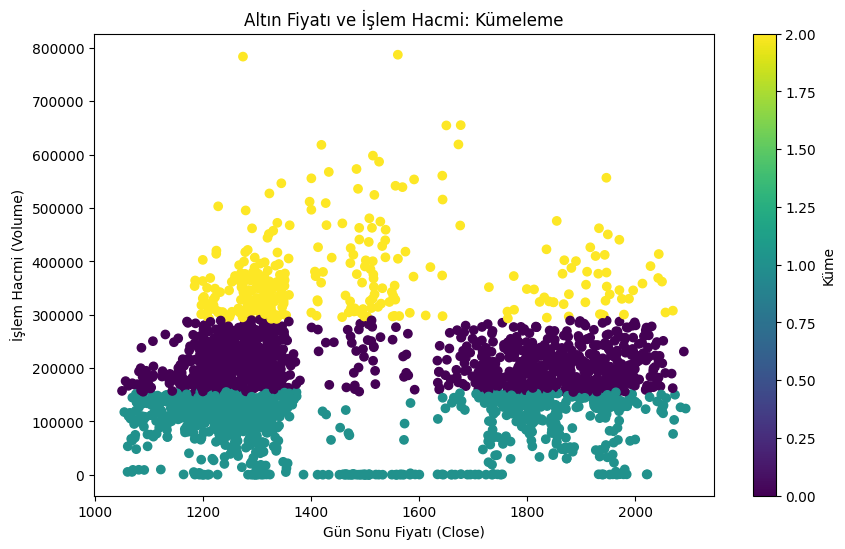


Küme İstatistikleri:

Küme 0 Özellikleri:
Ortalama Gün Sonu Fiyatı: 1538.39
Ortalama İşlem Hacmi: 209895.51
Ortalama Gün Başlangıcı Fiyatı: 1538.15

Küme 1 Özellikleri:
Ortalama Gün Sonu Fiyatı: 1459.38
Ortalama İşlem Hacmi: 99719.10
Ortalama Gün Başlangıcı Fiyatı: 1458.92

Küme 2 Özellikleri:
Ortalama Gün Sonu Fiyatı: 1464.52
Ortalama İşlem Hacmi: 371366.04
Ortalama Gün Başlangıcı Fiyatı: 1467.04


In [9]:
# #6) Gizli (Örtük) Değişkenler - Gerçek Veri Örneği
print("#6) Gizli (Örtük) Değişkenler - Kümeleme Örneği")

# Gözlemlenebilir değişkenler
X_clustering = data[['Close', 'Volume', 'Open']]

# Gizli değişken: Küme (gerçek hayatta bilinmez)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_clustering)

# Görselleştirme
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_clustering['Close'], X_clustering['Volume'], c=clusters, cmap='viridis')
plt.colorbar(scatter, label='Küme')
plt.title('Altın Fiyatı ve İşlem Hacmi: Kümeleme')
plt.xlabel('Gün Sonu Fiyatı (Close)')
plt.ylabel('İşlem Hacmi (Volume)')
plt.show()

# Küme analizi
data['Cluster'] = clusters
print("\nKüme İstatistikleri:")
for cluster in range(3):
    cluster_data = data[data['Cluster'] == cluster]
    print(f"\nKüme {cluster} Özellikleri:")
    print(f"Ortalama Gün Sonu Fiyatı: {cluster_data['Close'].mean():.2f}")
    print(f"Ortalama İşlem Hacmi: {cluster_data['Volume'].mean():.2f}")
    print(f"Ortalama Gün Başlangıcı Fiyatı: {cluster_data['Open'].mean():.2f}")